In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore") # this will take away the red dialog boxes in the output terminal

In [2]:
df = pd.read_csv('C:/Users/wersc/Downloads/Turnover.csv').drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [3]:
df.shape

(1470, 31)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

No missing values in the dataset, most Columns are integers. Time to explore the object type columns:

In [7]:
object_cols = [col for col in  df.columns if df[col].dtype == 'O']
for col in object_cols:
    counts = df[col].value_counts(normalize=True,dropna=False).to_frame()
    counts[col] = round(counts[col]*100,2)
    print(counts)

     Attrition
No       83.88
Yes      16.12
                   BusinessTravel
Travel_Rarely               70.95
Travel_Frequently           18.84
Non-Travel                  10.20
                        Department
Research & Development       65.37
Sales                        30.34
Human Resources               4.29
                  EducationField
Life Sciences              41.22
Medical                    31.56
Marketing                  10.82
Technical Degree            8.98
Other                       5.58
Human Resources             1.84
        Gender
Male      60.0
Female    40.0
                           JobRole
Sales Executive              22.18
Research Scientist           19.86
Laboratory Technician        17.62
Manufacturing Director        9.86
Healthcare Representative     8.91
Manager                       6.94
Sales Representative          5.65
Research Director             5.44
Human Resources               3.54
          MaritalStatus
Married           45.78
Singl

What jumps out to me is that out target variable (Attrition) isn't very balanced. 
Lets see hwo attrition rates vary by object variables.
We'll decide on 20% or more to be "High attrition"

In [8]:
def attritionby_x(df,col,sort=True):
    df = df.groupby([col])['Attrition'].value_counts(normalize=True).to_frame()
    df.rename(columns={'Attrition':'Attrition %'},inplace=True)
    df['Attrition %'] = round(df['Attrition %']*100,2)
    df = df.reset_index()
    df = df[np.logical_and(df['Attrition'] == 'Yes',df['Attrition %']>20)]
    df = df.drop('Attrition',axis=1)
    if sort:
        df = df.sort_values('Attrition %',ascending=False)
    return df
for col in object_cols[1:]:
    print(attritionby_x(df,col))

      BusinessTravel  Attrition %
3  Travel_Frequently        24.91
  Department  Attrition %
5      Sales        20.63
      EducationField  Attrition %
1    Human Resources        25.93
11  Technical Degree        24.24
5          Marketing        22.01
Empty DataFrame
Columns: [Gender, Attrition %]
Index: []
                  JobRole  Attrition %
17   Sales Representative        39.76
5   Laboratory Technician        23.94
3         Human Resources        23.08
  MaritalStatus  Attrition %
5        Single        25.53
  OverTime  Attrition %
3      Yes        30.53


Unsprisingly it looks like being Single, working overtime, and working in Sales have higher attrition rates

Now what about the age of Employees who quit?

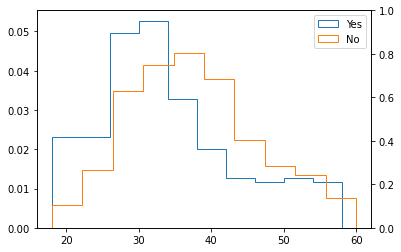

In [10]:
quitters = df[df['Attrition'] == 'Yes']
keepers = df[df['Attrition'] == 'No']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(quitters['Age'],histtype='step',density=True)
ax2=ax1.twinx()
ax1.hist(keepers['Age'],histtype='step',density=True)
ax1.legend(['Yes','No'])

It seems that younger people tend to quit more often

<AxesSubplot:>

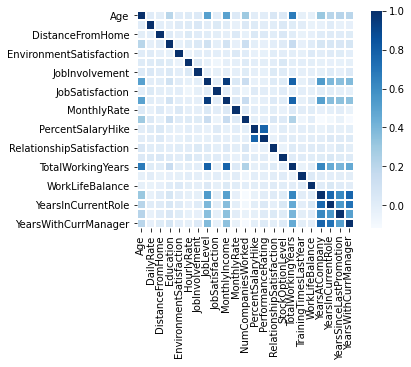

In [15]:
sns.heatmap(df.corr(),cmap='Blues',square=True,linewidths=1)